In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DavidMairena/Heart_Attack_Possibility/main/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.shape

(920, 16)

### Explotarory Data Analysis

In [ ]:
df.dataset.unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [ ]:
dataset = px.histogram(df ,x = 'dataset', color='num', barmode='group', 
                    category_orders = {'num': [0,1,2,3,4]}, 
                    title='Number of Heart Disease by dataset',
                    labels={'dataset':'Cities in the dataset', 'num':'Diagnosis of heart disease'})
dataset.update_layout(legend=dict(
                        orientation="h",
                        yanchor="bottom", y=1.02,
                        xanchor="right", x=1))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.drop('dataset', axis=1, inplace=True)

In [ ]:
df.cp.value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [ ]:
df_fixed[df_fixed.num == 1].num.value_counts()

1    509
Name: num, dtype: int64

In [ ]:
df_fixed = df
df_fixed.dropna(inplace=True)
df_fixed.num.replace([2,3,4], 1, inplace = True)
df_fixed_sex = df_fixed[df_fixed.num == 1]

px.histogram(df_fixed, x = 'sex', color='num', barmode='stack', title='Number of male and female in the dataset',
                    labels={'num':'Diagnosis of heart disease'})

In [ ]:
px.pie(df_fixed[df_fixed.sex == 'Female'], values='id', names='num', color_discrete_sequence=['royalblue','magenta'], title='Amount of Heart Disease in Female')


In [ ]:
px.pie(df_fixed[df_fixed.sex == 'Male'], values='id', names='num', color_discrete_sequence=['royalblue','magenta'], title='Amount of Heart Disease in male')
sex.update_traces(textposition='inside', textinfo='percent+label')

(299, 16)
Male      114
Female     25
Name: sex, dtype: int64


In [ ]:
cp = px.histogram(df ,x = 'cp', color='num', barmode='group', 
                    category_orders = {'num': [0,1,2,3,4]}, 
                    title='Number of Heart Disease by chest pain type',
                    labels={'cp':'Chest Pain Type', 'num':'Diagnosis of heart disease'})
cp.update_layout(legend=dict(
                        orientation="h",
                        yanchor="bottom", y=1.02,
                        xanchor="right", x=1))

In [ ]:
thal = px.histogram(df, x = 'thal', color='num', barmode='group',
                category_orders = {'num': [0,1,2,3,4]}, 
                title='Number of Heart Disease due to Thalassemia',
                labels={'thal':'Thalassemia','num':'Diagnosis of heart disease'})
                
thal.update_layout(legend=dict(
                    orientation="h",
                    yanchor="bottom", y=1.02,
                    xanchor="right", x=1))

In [ ]:

rest = px.histogram(df ,x = 'restecg', color='num', barmode='group', 
                    category_orders = {'num': [0,1,2,3,4]}, 
                    title='Number of Heart Disease related to resting electrocardiographic results',
                    labels={'restecg':'resting electrocardiographic results', 'num':'Diagnosis of heart disease'})
rest.update_layout(legend=dict(
                        orientation="h",
                        yanchor="bottom", y=1.02,
                        xanchor="right", x=1))

In [ ]:
fbs = px.histogram(df, x = 'fbs', color='num', barmode='stack',
                    category_orders = {'num': [0,1,2,3,4]}, 
                    title='Number of Heart Disease when fasting blood sugar is more 120 mg/dl',
                    labels={'fbs':'Fasting Blood Sugar','num':'Diagnosis of heart disease'})
fbs.update_layout(legend=dict(
                        orientation="h",
                        yanchor="bottom", y=1.02,
                        xanchor="right", x=1))

### Missing values

Percentage of missing values in the dataset

In [ ]:
round(df.isnull().sum()/len(df)*100, 2)

id           0.00
age          0.00
sex          0.00
cp           0.00
trestbps     6.41
chol         3.26
fbs          9.78
restecg      0.22
thalch       5.98
exang        5.98
oldpeak      6.74
slope       33.59
ca          66.41
thal        52.83
num          0.00
dtype: float64

Correlation between the features and heatmap

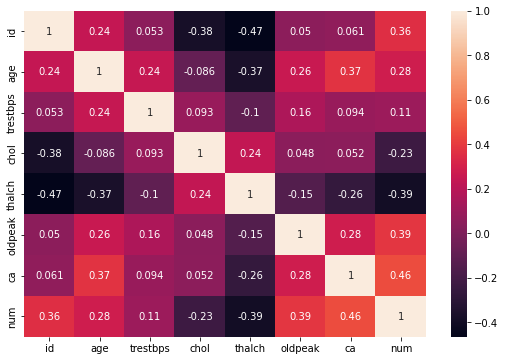

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(df_corr, annot=True)

## Creating Model and Pipelines

Eliminated all NA values from the dataset as well as join all levels of heart disease into one 

In [ ]:
df_not_null = df.dropna()
df_not_null.shape


(299, 15)

In [ ]:
df_not_null.num = df_not_null.num.replace([2,3,4], 1)
df_not_null


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,1
300,301,57,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,1
301,302,57,Female,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,509,47,Male,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


Split the dataset into features and targets and 80% train and 20% test

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 

features = df_not_null.drop(['num', 'id', 'oldpeak'], axis=1)
target = df_not_null.num

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (239, 12)
X_test shape:  (60, 12)
y_train shape:  (239,)
y_test shape:  (60,)


In [ ]:
model_numeric_features = X_train.select_dtypes(exclude=['object', 'category']).columns
model_categorical_features = X_train.select_dtypes(['object', 'category']).columns
print(model_numeric_features)
print(model_categorical_features)

Index(['age', 'trestbps', 'chol', 'thalch', 'ca'], dtype='object')
Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


### Logistic Regression

Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

numeric_transformer = Pipeline( steps=[ ('scaler', StandardScaler()) ])

categorical_transformer = Pipeline( steps=[ ('one_hot', OneHotEncoder(handle_unknown='ignore')) ])

preprocessor = ColumnTransformer( transformers=[ ('numeric', numeric_transformer, model_numeric_features), ('categorical', categorical_transformer, model_categorical_features) ])

clf = Pipeline( steps=[ ('preprocessor', preprocessor), ('Logistic_reg', LogisticRegression(solver='liblinear')) ])

clf.fit(X_train, y_train)

logistic_preds = clf.predict(X_test)

Results

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logistic_preds))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.85      0.92      0.88        25

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

